# **Phase 1:** Data Exploration and Assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Task 1.1: Initial Data Inspection

In [2]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

In [3]:
# Check the shape and basic info
print(df.shape)
print(df.info())

(21950, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21950 entries, 0 to 21949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21950 non-null  object 
 1   is_canceled                     21950 non-null  int64  
 2   lead_time                       21950 non-null  int64  
 3   arrival_date_year               21950 non-null  int64  
 4   arrival_date_month              21950 non-null  object 
 5   arrival_date_week_number        21950 non-null  int64  
 6   arrival_date_day_of_month       21950 non-null  int64  
 7   stays_in_weekend_nights         21950 non-null  int64  
 8   stays_in_week_nights            21950 non-null  int64  
 9   adults                          21950 non-null  int64  
 10  children                        21950 non-null  int64  
 11  babies                          21950 non-null  int64  
 12  meal                

In [4]:
#First 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
#Last 5 rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21945,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0,1,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13
21948,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,No Deposit,375.0,NaN,0,Transient-Party,25.0,0.0,0.0,Check-Out,2016-03-13
21949,Resort Hotel,0,1,2016,March,11,12,0,1,1,...,No Deposit,250.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


In [6]:
print("\nStatistical Summary:\n")
print(df.describe(include='all'))


Statistical Summary:

               hotel   is_canceled     lead_time  arrival_date_year  \
count          21950  21950.000000  21950.000000       21950.000000   
unique             1           NaN           NaN                NaN   
top     Resort Hotel           NaN           NaN                NaN   
freq           21950           NaN           NaN                NaN   
mean             NaN      0.505011    101.529977        2015.829066   
std              NaN      0.499986    101.082346           0.746540   
min              NaN      0.000000      0.000000        2015.000000   
25%              NaN      0.000000     15.000000        2015.000000   
50%              NaN      1.000000     69.000000        2016.000000   
75%              NaN      1.000000    168.000000        2016.000000   
max              NaN      1.000000    737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count               21950              21950.000000   
unique        

# Task 1.2: Missing Value Analysis

In [7]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)

print("Missing Value Report:\n")
print(missing_df)

Missing Value Report:

                                Missing Values  Percentage (%)
company                                  20108       91.608200
agent                                     4639       21.134396
country                                    455        2.072893
adr                                          1        0.004556
total_of_special_requests                    1        0.004556
reservation_status_date                      1        0.004556
reservation_status                           1        0.004556
required_car_parking_spaces                  1        0.004556
stays_in_weekend_nights                      0        0.000000
hotel                                        0        0.000000
lead_time                                    0        0.000000
is_canceled                                  0        0.000000
arrival_date_month                           0        0.000000
arrival_date_week_number                     0        0.000000
arrival_date_day_of_month       

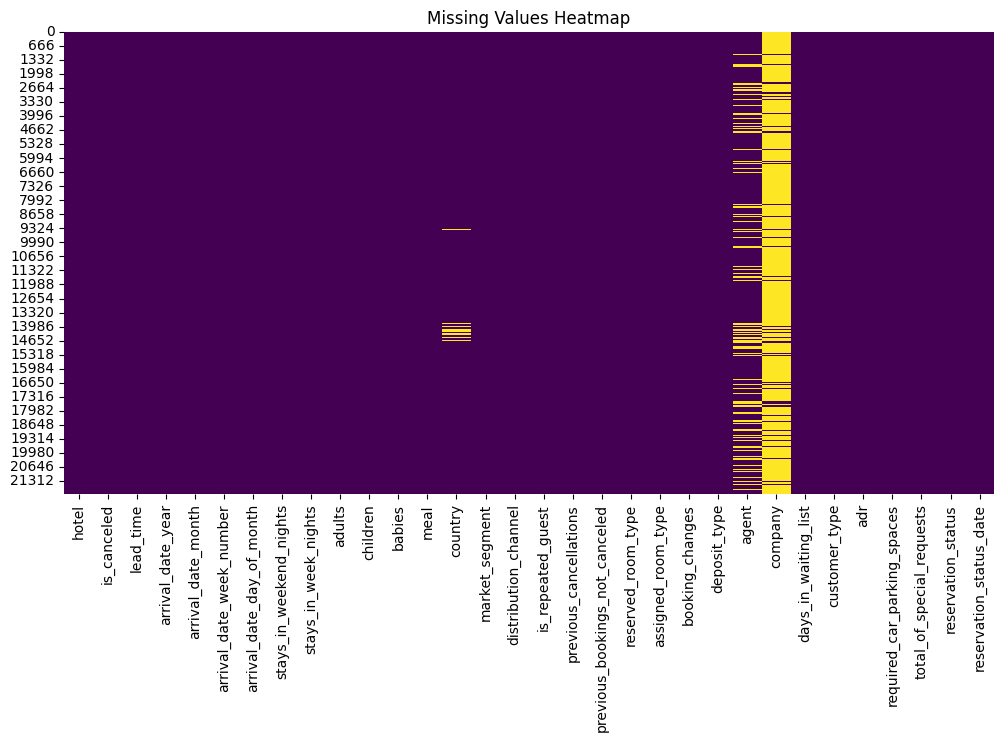

In [8]:
# Visualize missing values using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Task 1.3: Data Quality Assessment

In [9]:
# 1. Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")



Number of duplicate rows: 4433


In [10]:
# 2. Quick summary of numerical columns to spot outliers
print("\nSummary of numerical columns:\n")
print(df.describe())



Summary of numerical columns:

        is_canceled     lead_time  arrival_date_year  \
count  21950.000000  21950.000000       21950.000000   
mean       0.505011    101.529977        2015.829066   
std        0.499986    101.082346           0.746540   
min        0.000000      0.000000        2015.000000   
25%        0.000000     15.000000        2015.000000   
50%        1.000000     69.000000        2016.000000   
75%        1.000000    168.000000        2016.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              21950.000000               21950.000000   
mean                  28.522551                  15.629157   
std                   14.328740                   8.929175   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   30.000000                  16.000000   
75%                   40.0000

In [11]:
# 3. Examine unique values in some categorical columns
categorical_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'customer_type']
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'hotel':
['Resort Hotel']

Unique values in 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR']

Unique values in 'market_segment':
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']

Unique values in 'distribution_channel':
['Direct' 'Corporate' 'TA/TO' 'Undefined']

Unique values in 'customer_type':
['Transien

# **Phase 2:** Data Cleaning Implementation

# Task 2.1: Handling Missing Values

In [12]:
# 1. Fill missing values in 'children' column with 0
df['children'].fillna(0, inplace=True)

# 2. Fill missing values in 'agent' and 'company' with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# 3. Fill missing 'country' values with mode (most frequent value)
mode_country = df['country'].mode()[0]
df['country'].fillna(mode_country, inplace=True)

# Double check missing values again
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Task 2.2 – Duplicate Detection and Removal

In [13]:
# Check for exact duplicates
duplicates = df.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

# Drop exact duplicates
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)

Number of exact duplicates: 4441
New shape after removing duplicates: (17509, 32)


# Task 2.3 – Outlier Detection and Treatment

lead_time → Outliers detected: 290


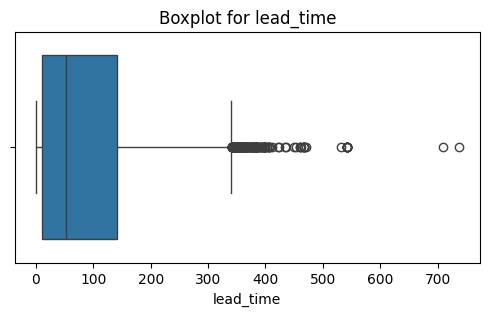

stays_in_weekend_nights → Outliers detected: 81


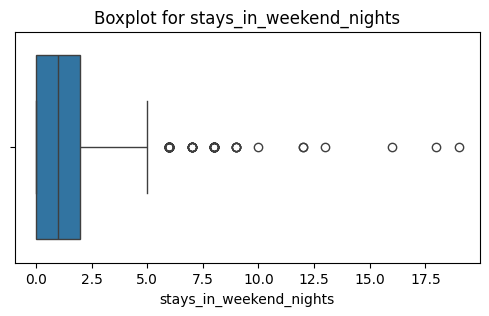

stays_in_week_nights → Outliers detected: 100


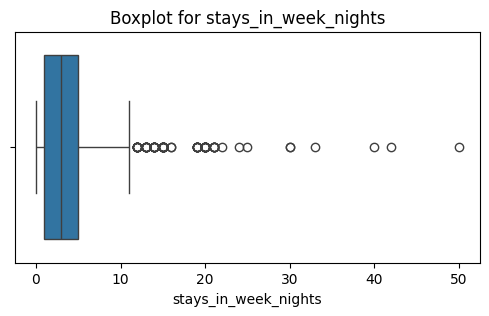

adults → Outliers detected: 4029


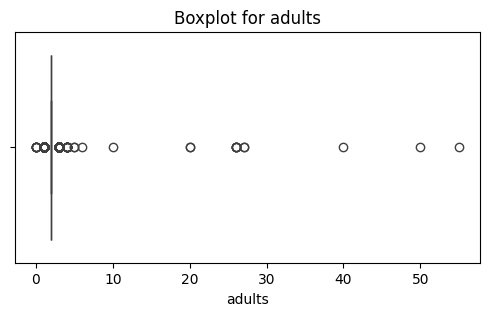

children → Outliers detected: 1892


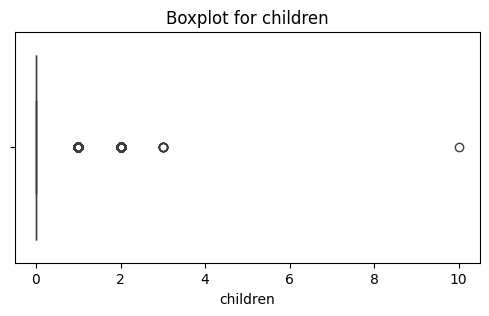

babies → Outliers detected: 253


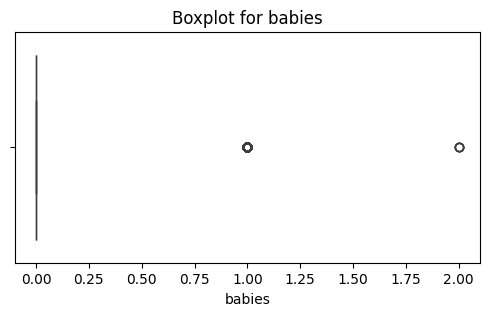

adr → Outliers detected: 277


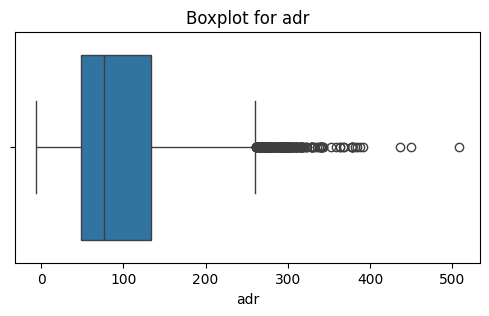

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Columns to check for outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
           'adults', 'children', 'babies', 'adr']

# Visualize boxplots and count outliers
for col in columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} → Outliers detected: {len(outliers)}")

    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


# Task 2.4 – Data Inconsistency Fixes

In [15]:
# 1. Remove rows with zero guests (adults, children, babies all zero)
zero_guests = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
print(f"Rows with zero guests: {len(zero_guests)}")
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# 2. Combine date columns into a single datetime column
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# 3. Check and clean inconsistent categorical values
print("Unique meal types before cleaning:", df['meal'].unique())



Rows with zero guests: 7
Unique meal types before cleaning: ['BB' 'FB' 'HB' 'SC' 'Undefined']


# **Phase 3**: Data Validation and Documentation

# Task 3.1: Data Integrity Checks

In [16]:
# 01) Check that the total number of guests > 0
# (No bookings should have zero guests.)

invalid_guests = df[(df['adults'] + df['children'] + df['babies']) == 0]
print("Bookings with 0 guests:", len(invalid_guests))

Bookings with 0 guests: 0


In [17]:
# 02) Verify arrival dates are in the correct range
# Should be between July 2015 and August 2017 (as per dataset description)

print("Earliest arrival date:", df['arrival_date'].min())
print("Latest arrival date:", df['arrival_date'].max())


Earliest arrival date: 2015-07-01 00:00:00
Latest arrival date: 2017-08-31 00:00:00


In [18]:
# 03) Check for numerical value ranges

print("Minimum lead_time:", df['lead_time'].min())
print("Minimum adr:", df['adr'].min())


Minimum lead_time: 0
Minimum adr: -6.38


In [19]:
# 04) Validate categorical columns

print(df['meal'].unique())
print(df['deposit_type'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']
['No Deposit' 'Refundable' 'Non Refund']


# Task 3.3: Final Dataset Preparation

In [20]:
#Save the final cleaned dataset

df.to_csv('hotel_bookings_cleaned.csv', index=False)

# Advanced Extensions

# **Extension 1:** Feature Engineering

In [21]:


# Feature 1: Total stay duration (total nights)
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Feature 2: Total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Feature 3: Revenue (customer value proxy)
df['revenue'] = df['adr'] * df['total_nights']

# Preview new columns
df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights',
    'adults', 'children', 'babies', 'total_guests', 'adr', 'revenue']].head()


,stays_in_weekend_nights,stays_in_week_nights,total_nights,adults,children,babies,total_guests,adr,revenue
0,0,0,0,2,0,0,2,0.0,0.0
1,0,0,0,2,0,0,2,0.0,0.0
2,0,1,1,1,0,0,1,75.0,75.0
3,0,1,1,1,0,0,1,75.0,75.0
4,0,2,2,2,0,0,2,98.0,196.0


In [22]:
# Feature 4: Convert arrival_date to datetime if not already done
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d', errors='coerce'
)

# Feature 5: Season of booking (1: Winter, 2: Spring, 3: Summer, 4: Fall)
df['season'] = df['arrival_date'].dt.month % 12 // 3 + 1

# Feature 6: Is weekend arrival
df['is_weekend_arrival'] = df['arrival_date'].dt.dayofweek >= 5

# Feature 7: Lead time category
df['booking_notice'] = pd.cut(df['lead_time'],
                              bins=[0, 7, 30, 90, 365],
                              labels=['<1 week', '1-4 weeks', '1-3 months', '3+ months'])

# Preview new features
df[['arrival_date', 'season', 'is_weekend_arrival', 'lead_time', 'booking_notice']].head()


,arrival_date,season,is_weekend_arrival,lead_time,booking_notice
0,2015-07-01,3,False,342,3+ months
1,2015-07-01,3,False,737,NaN
2,2015-07-01,3,False,7,<1 week
3,2015-07-01,3,False,13,1-4 weeks
4,2015-07-01,3,False,14,1-4 weeks


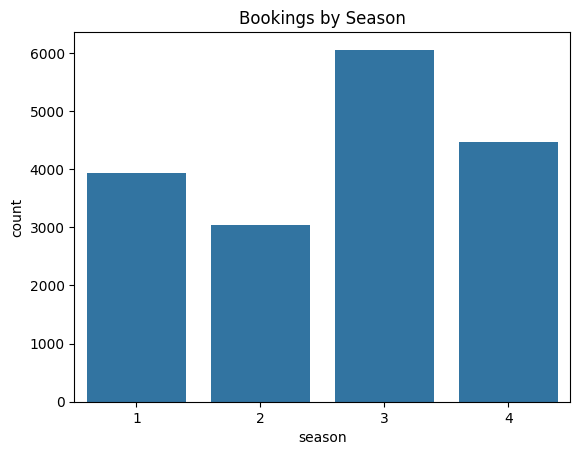

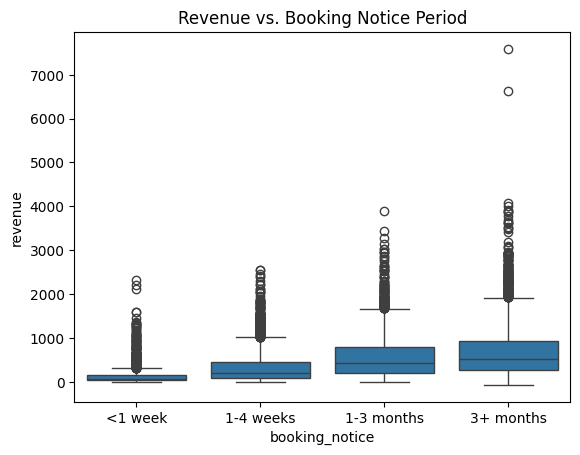

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bookings by season
sns.countplot(data=df, x='season')
plt.title('Bookings by Season')
plt.show()

# Revenue by lead time category
sns.boxplot(data=df, x='booking_notice', y='revenue')
plt.title('Revenue vs. Booking Notice Period')
plt.show()


# **Extension 2:** Automated Cleaning Pipeline


In [ ]:
# Function to handle missing values
def handle_missing_values(df):
    df['children'].fillna(0, inplace=True)
    df['agent'].fillna(0, inplace=True)
    df['company'].fillna(0, inplace=True)
    df['country'].fillna(df['country'].mode()[0], inplace=True)
    return df

# Function to remove duplicates
def remove_duplicates(df):
    return df.drop_duplicates()

# Function to fix inconsistencies
def fix_inconsistencies(df):
    # Remove rows where there are 0 guests
    df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

    # Combine year, month, day into one datetime column
    df['arrival_date'] = pd.to_datetime(
        df['arrival_date_year'].astype(str) + '-' +
        df['arrival_date_month'] + '-' +
        df['arrival_date_day_of_month'].astype(str),
        format='%Y-%B-%d',
        errors='coerce'
    )

    # Replace 'Undefined' meal types with 'SC'
    df['meal'].replace('Undefined', 'SC', inplace=True)

    return df


In [25]:
# Full pipeline function
def clean_hotel_data(df):
    df = handle_missing_values(df)
    df = remove_duplicates(df)
    df = fix_inconsistencies(df)
    return df


In [26]:
def validate_data(df):
    assert df.isnull().sum().sum() == 0, "There are still missing values."
    assert (df['adults'] + df['children'] + df['babies'] > 0).all(), "There are bookings with 0 guests!"
    assert df['arrival_date'].notnull().all(), "Arrival date conversion failed."
    return True


In [28]:
# Function to handle missing values
def handle_missing_values(df):
    df['children'].fillna(0, inplace=True)
    df['agent'].fillna(0, inplace=True)
    df['company'].fillna(0, inplace=True)
    df['country'].fillna(df['country'].mode()[0], inplace=True)
    return df

# Function to remove duplicates
def remove_duplicates(df):
    return df.drop_duplicates()

# Function to fix inconsistencies
def fix_inconsistencies(df):
    # Remove rows where there are 0 guests
    df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

    # Combine year, month, day into one datetime column
    df['arrival_date'] = pd.to_datetime(
        df['arrival_date_year'].astype(str) + '-' +
        df['arrival_date_month'] + '-' +
        df['arrival_date_day_of_month'].astype(str),
        format='%Y-%B-%d',
        errors='coerce'
    )

    # Replace 'Undefined' meal types with 'SC'
    df['meal'].replace('Undefined', 'SC', inplace=True)

    return df

# Full pipeline function
def clean_hotel_data(df):
    df = handle_missing_values(df)
    df = remove_duplicates(df)
    df = fix_inconsistencies(df)
    return df

def validate_data(df):
    assert df.isnull().sum().sum() == 0, "There are still missing values."
    assert (df['adults'] + df['children'] + df['babies'] > 0).all(), "There are bookings with 0 guests!"
    assert df['arrival_date'].notnull().all(), "Arrival date conversion failed."
    return True


# Reload the original dataset (or simulate new incoming data)
df_raw = pd.read_csv('hotel_bookings.csv')

# Run the cleaning pipeline
df_cleaned = clean_hotel_data(df_raw.copy())

# Validate the cleaned dataset
validate_data(df_cleaned)

# Preview cleaned data
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


# **Extension 3:** Quality Metrics & Dashboards

In [29]:
# Function to summarize data quality
def data_quality_summary(df):
    return {
        'Missing Values': df.isnull().sum().sum(),
        'Duplicate Rows': df.duplicated().sum(),
        'Rows with 0 Guests': len(df[(df['adults'] + df['children'] + df['babies']) == 0])
    }


In [30]:
# Load original dataset again for comparison
df_raw = pd.read_csv('hotel_bookings.csv')
df_raw['children'].fillna(0, inplace=True)  # quick fix for total_guests calc
df_raw['total_guests'] = df_raw['adults'] + df_raw['children'] + df_raw['babies']

# Clean dataset using your pipeline
df_cleaned = clean_hotel_data(df_raw.copy())

# Calculate quality metrics
before_metrics = data_quality_summary(df_raw)
after_metrics = data_quality_summary(df_cleaned)

# Show them
print("✅ Data Quality BEFORE Cleaning:")
print(before_metrics)
print("\n✅ Data Quality AFTER Cleaning:")
print(after_metrics)


✅ Data Quality BEFORE Cleaning:
{'Missing Values': np.int64(129421), 'Duplicate Rows': np.int64(31994), 'Rows with 0 Guests': 180}

✅ Data Quality AFTER Cleaning:
{'Missing Values': np.int64(0), 'Duplicate Rows': np.int64(0), 'Rows with 0 Guests': 0}


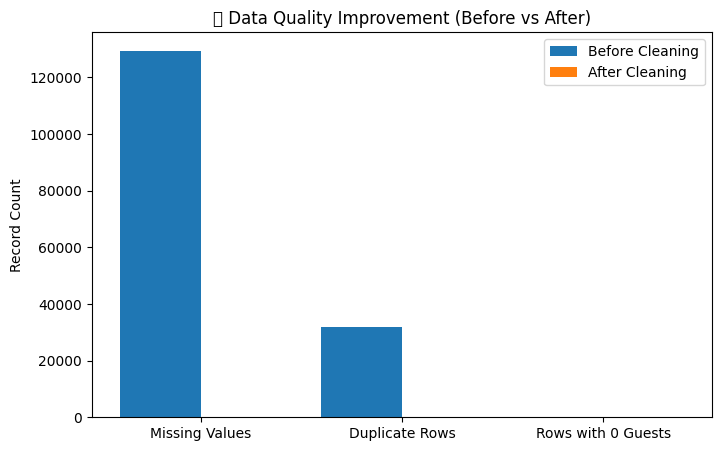

In [32]:
import matplotlib.pyplot as plt

#Comparison Bar Chart
labels = list(before_metrics.keys())
before_values = list(before_metrics.values())
after_values = list(after_metrics.values())

x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x, before_values, width=0.4, label='Before Cleaning', align='center')
plt.bar([i + 0.4 for i in x], after_values, width=0.4, label='After Cleaning', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.title('🧼 Data Quality Improvement (Before vs After)')
plt.ylabel('Record Count')
plt.legend()
plt.show()
